# Time Series Prediction - Predicting Daily Views of Websites

The main goal of this project is to show how we can predict the daily views of webpages based on temporal pas data. This project will show how ML models can be applied in such an environment, but it can also be applied to several different problems.

My goal is to show how Deep Neural Nets (DNN), Recurrent Neural Nets (RNN), and Random Forest (RF) can be used to predict daily views for different websites.


### Contents
1. [Method](#Method)
2. [Importing Dataset](#Importing-Dataset)
3. [Defining Models](#Defining-Models)
4. [Training for "NBA" article](#Training-for-"NBA"-article)
5. [Training for "Netflix" article](#Training-for-"Netflix"-article)
6. [Training for "Python" article](#Training-for-"Python"-article)
7. [Training for "YouTube" article](#Training-for-"YouTube"-article)
8. [Training for "IPhone" article](#Training-for-"IPhone"-article)
9. [Comparison](#Comparison)
10. [Conslusion](#Conclusion)

### Method

To achieve our goal, the following approach is considered:
![fig](images/method.png)

1. The dataset is imported and preprocessed;
2. The templates for all models are created;
3. For all webpages, DNN, RNN, and RF models and trained and evaluated;
4. Finally, all models are compared (based on Root Mean Squared Error - RMSE).

### Importing Dataset

The dataset used in this project is available on [kaggle](https://www.kaggle.com/c/web-traffic-time-series-forecasting). The data refers to a time series of daily views for different websites.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv('../input/web-traffic-time-series-forecasting/train_1.csv.zip')
df = df.fillna(0)

In [3]:
df1 = df[df['Page']=='NBA_zh.wikipedia.org_all-access_spider'].T.reset_index()[1:]
df1['views'] = df1[df1.columns[1]]
df1 = df1[:-1]
del df1[df1.columns[1]]

df2 = df[df['Page']=='Netflix_zh.wikipedia.org_all-access_spider'].T.reset_index()[1:]
df2['views'] = df2[df2.columns[1]]
df2 = df2[:-1]
del df2[df2.columns[1]]


df3 = df[df['Page']=='Python_zh.wikipedia.org_all-access_spider'].T.reset_index()[1:]
df3['views'] = df3[df3.columns[1]]
df3 = df3[:-1]
del df3[df3.columns[1]]

df4 = df[df['Page']=='YouTube_zh.wikipedia.org_all-access_spider'].T.reset_index()[1:]
df4['views'] = df4[df4.columns[1]]
df4 = df4[:-1]
del df4[df4.columns[1]]

df5 = df[df['Page']=='IPhone_zh.wikipedia.org_all-access_spider'].T.reset_index()[1:]
df5['views'] = df5[df5.columns[1]]
df5 = df5[:-1]
del df5[df5.columns[1]]

In [4]:
def prepare_daset(data, number_of_days_to_consider):
    d = data[:]
    for i in range(1, number_of_days_to_consider+1):
        d['views_d-{}'.format(i)] = data['views'].shift(+i)
    return d

In [5]:
df1 = prepare_daset(df1, number_of_days_to_consider=100).dropna().reset_index()
df2 = prepare_daset(df2, number_of_days_to_consider=100).dropna().reset_index()
df3 = prepare_daset(df3, number_of_days_to_consider=100).dropna().reset_index()
df4 = prepare_daset(df4, number_of_days_to_consider=100).dropna().reset_index()
df5 = prepare_daset(df5, number_of_days_to_consider=100).dropna().reset_index()

In [6]:
from sklearn.preprocessing import MinMaxScaler
for c in df1.columns:
    if c in ['index', 'views', 'level_0']:
        continue
    else:
        df1[c] = MinMaxScaler().fit_transform(df1[c].values.reshape(df1[c].shape + (1,)))
        df2[c] = MinMaxScaler().fit_transform(df2[c].values.reshape(df1[c].shape + (1,)))
        df3[c] = MinMaxScaler().fit_transform(df3[c].values.reshape(df1[c].shape + (1,)))
        df4[c] = MinMaxScaler().fit_transform(df4[c].values.reshape(df1[c].shape + (1,)))
        df5[c] = MinMaxScaler().fit_transform(df5[c].values.reshape(df1[c].shape + (1,)))

In [7]:
X_train1, y_train1 = df1[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][:400], df1['views'][:400]
X_test1, y_test1 = df1[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][400:], df1['views'][400:]

X_train2, y_train2 = df2[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][:400], df2['views'][:400]
X_test2, y_test2 = df2[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][400:], df2['views'][400:]

X_train3, y_train3 = df3[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][:400], df3['views'][:400]
X_test3, y_test3 = df3[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][400:], df3['views'][400:]

X_train4, y_train4 = df4[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][:400], df4['views'][:400]
X_test4, y_test4 = df4[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][400:], df4['views'][400:]

X_train5, y_train5 = df5[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][:400], df5['views'][:400]
X_test5, y_test5 = df5[[c for c in df1.columns if c not in ['index', 'views', 'level_0']]][400:], df5['views'][400:]

In [8]:
X_train1_RNN, y_train1_RNN = X_train1.values.reshape( (X_train1.shape[0], 1, X_train1.shape[1]) ), y_train1.values.reshape( (y_train1.shape[0], 1, 1) )
X_test1_RNN, y_test1_RNN = X_test1.values.reshape( (X_test1.shape[0], 1, X_test1.shape[1]) ), y_test1.values.reshape( (y_test1.shape[0], 1, 1) )

X_train2_RNN, y_train2_RNN = X_train2.values.reshape( (X_train2.shape[0], 1, X_train2.shape[1]) ), y_train2.values.reshape( (y_train2.shape[0], 1, 1) )
X_test2_RNN, y_test2_RNN = X_test2.values.reshape( (X_test2.shape[0], 1, X_test2.shape[1]) ), y_test2.values.reshape( (y_test2.shape[0], 1, 1) )

X_train3_RNN, y_train3_RNN = X_train3.values.reshape( (X_train3.shape[0], 1, X_train3.shape[1]) ), y_train3.values.reshape( (y_train3.shape[0], 1, 1) )
X_test3_RNN, y_test3_RNN = X_test3.values.reshape( (X_test3.shape[0], 1, X_test3.shape[1]) ), y_test3.values.reshape( (y_test3.shape[0], 1, 1) )

X_train4_RNN, y_train4_RNN = X_train4.values.reshape( (X_train4.shape[0], 1, X_train4.shape[1]) ), y_train4.values.reshape( (y_train4.shape[0], 1, 1) )
X_test4_RNN, y_test4_RNN = X_test4.values.reshape( (X_test4.shape[0], 1, X_test4.shape[1]) ), y_test4.values.reshape( (y_test4.shape[0], 1, 1) )

X_train5_RNN, y_train5_RNN = X_train5.values.reshape( (X_train5.shape[0], 1, X_train5.shape[1]) ), y_train5.values.reshape( (y_train5.shape[0], 1, 1) )
X_test5_RNN, y_test5_RNN = X_test5.values.reshape( (X_test5.shape[0], 1, X_test5.shape[1]) ), y_test5.values.reshape( (y_test5.shape[0], 1, 1) )

### Defining Models

In [9]:
def model_DNN_factory():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    model.compile(optimizer=tf.optimizers.RMSprop(), loss='mse')
    return model

def model_RNN_factory(X_train):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    tf.keras.layers.LSTM(128, activation='relu')
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    model.compile(optimizer=tf.optimizers.RMSprop(), loss='mse')
    return model


def model_RF_factory():
    model = RandomForestRegressor(n_jobs=-1)
    return model
    

### Training for "NBA" article

In [10]:
# Building Models
DNN = model_DNN_factory()
RNN = model_RNN_factory(X_train1_RNN)
RF = model_RF_factory()

# Training Models
DNN.fit(tf.convert_to_tensor(X_train1.astype('float64')), tf.convert_to_tensor(y_train1.astype('float64')), batch_size=32, epochs=100, verbose=0)
RF.fit((X_train1), (y_train1))
RNN.fit(tf.convert_to_tensor(X_train1.astype('float64')), tf.convert_to_tensor(y_train1.astype('float64')), batch_size=32, epochs=100, verbose=0)

# Testing Models
DNN_prediction1 = DNN.predict(tf.convert_to_tensor(X_test1.astype('float64')))
print('DNN_rmse = ', np.sqrt(mean_squared_error(y_test1, DNN_prediction1)))

RF_prediction1 = RF.predict(X_test1)
print('RF_rmse = ', np.sqrt(mean_squared_error(y_test1, RF_prediction1)))

RNN_prediction1 = RNN.predict(tf.convert_to_tensor(X_test1.astype('float64')))
print('RNN_rmse = ', np.sqrt(mean_squared_error(y_test1, RNN_prediction1)))

# Plotting Predictions
plt.figure(figsize=(20,10))
plt.plot(list(range(len(DNN_prediction1.reshape(-1)) )), DNN_prediction1.reshape(-1).tolist(), label='DNN prediction')
plt.plot(list(range(len(RF_prediction1) )), RF_prediction1, label='RF prediction')
plt.plot(list(range(len(RNN_prediction1) )), RNN_prediction1, label='RNN prediction')
plt.plot(list(range(len(y_test1))), y_test1, label='true')
plt.legend()
plt.ylabel('Views')
plt.xlabel('day')

DNN_rmse =  63.3195471921889
RF_rmse =  66.90702922102933
RNN_rmse =  68.36218084697714


Text(0.5, 0, 'day')

### Training for "Netflix" article


In [11]:
# Building Models
DNN = model_DNN_factory()
RNN = model_RNN_factory(X_train2_RNN)
RF = model_RF_factory()

X_train, y_train = X_train2, y_train2

# Training Models
DNN.fit(tf.convert_to_tensor(X_train2.astype('float64')), tf.convert_to_tensor(y_train2.astype('float64')), batch_size=32, epochs=100, verbose=0)
RF.fit((X_train2), (y_train2))
RNN.fit(tf.convert_to_tensor(X_train2_RNN.astype('float64')), tf.convert_to_tensor(y_train2.astype('float64')), batch_size=32, epochs=100, verbose=0)

# Testing Models
DNN_prediction2 = DNN.predict(tf.convert_to_tensor(X_test2.astype('float64')))
print('DNN_rmse = ', np.sqrt(mean_squared_error(y_test2, DNN_prediction2)))

RF_prediction2 = RF.predict(X_test2)
print('RF_rmse = ', np.sqrt(mean_squared_error(y_test2, RF_prediction2)))

RNN_prediction2 = RNN.predict(tf.convert_to_tensor(X_test2_RNN.astype('float64')) )
RNN_prediction2 = RNN_prediction2.reshape(-1)
print('RNN_rmse = ', np.sqrt(mean_squared_error(y_test2, RNN_prediction2)))

# Plotting Predictions
plt.figure(figsize=(20,10))
plt.plot(list(range(len(DNN_prediction2.reshape(-1)) )), DNN_prediction2.reshape(-1).tolist(), label='DNN prediction')
plt.plot(list(range(len(RF_prediction2) )), RF_prediction2, label='RF prediction')
plt.plot(list(range(len(RNN_prediction2) )), RNN_prediction2, label='RNN prediction')
plt.plot(list(range(len(y_test2))), y_test2, label='true')
plt.legend()
plt.ylabel('Views')
plt.xlabel('day')

DNN_rmse =  9.585238375489801
RF_rmse =  11.058417054673876
RNN_rmse =  9.828358958474821


Text(0.5, 0, 'day')

### Training for "Python" article


DNN_rmse =  35.67137830823708
RF_rmse =  32.934086925746904
RNN_rmse =  31.682098129230017


Text(0.5, 0, 'day')

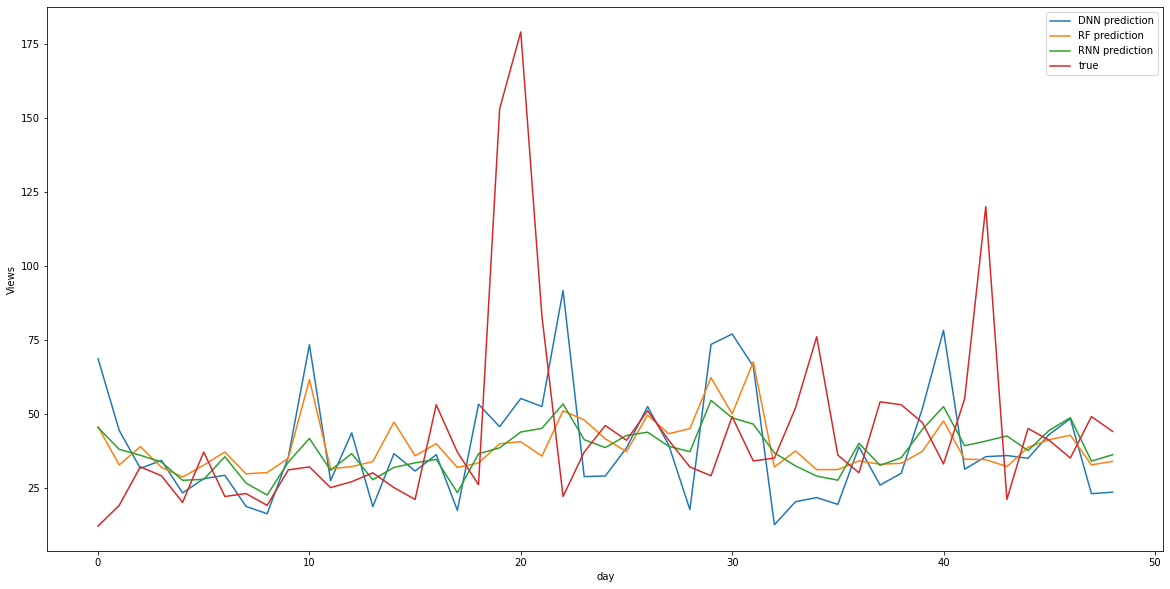

In [12]:
# Building Models
DNN = model_DNN_factory()
RNN = model_RNN_factory(X_train3_RNN)
RF = model_RF_factory()


# Training Models
DNN.fit(tf.convert_to_tensor(X_train3.astype('float64')), tf.convert_to_tensor(y_train3.astype('float64')), batch_size=32, epochs=100, verbose=0)
RF.fit((X_train3), (y_train3))
RNN.fit(tf.convert_to_tensor(X_train3_RNN.astype('float64')), tf.convert_to_tensor(y_train3.astype('float64')), batch_size=32, epochs=100, verbose=0)

# Testing Models
DNN_prediction3 = DNN.predict(tf.convert_to_tensor(X_test3.astype('float64')))
print('DNN_rmse = ', np.sqrt(mean_squared_error(y_test3, DNN_prediction3)))

RF_prediction3 = RF.predict(X_test3)
print('RF_rmse = ', np.sqrt(mean_squared_error(y_test3, RF_prediction3)))

RNN_prediction3 = RNN.predict(tf.convert_to_tensor(X_test3_RNN.astype('float64')) )
RNN_prediction3 = RNN_prediction3.reshape(-1)
print('RNN_rmse = ', np.sqrt(mean_squared_error(y_test3, RNN_prediction3)))

# Plotting Predictions
plt.figure(figsize=(20,10))
plt.plot(list(range(len(DNN_prediction3.reshape(-1)) )), DNN_prediction3.reshape(-1).tolist(), label='DNN prediction')
plt.plot(list(range(len(RF_prediction3) )), RF_prediction3, label='RF prediction')
plt.plot(list(range(len(RNN_prediction3) )), RNN_prediction3, label='RNN prediction')
plt.plot(list(range(len(y_test3))), y_test3, label='true')
plt.legend()
plt.ylabel('Views')
plt.xlabel('day')

### Training for "YouTube" article


DNN_rmse =  16.484690354575644
RF_rmse =  17.32227821185711
RNN_rmse =  15.239970555657555


Text(0.5, 0, 'day')

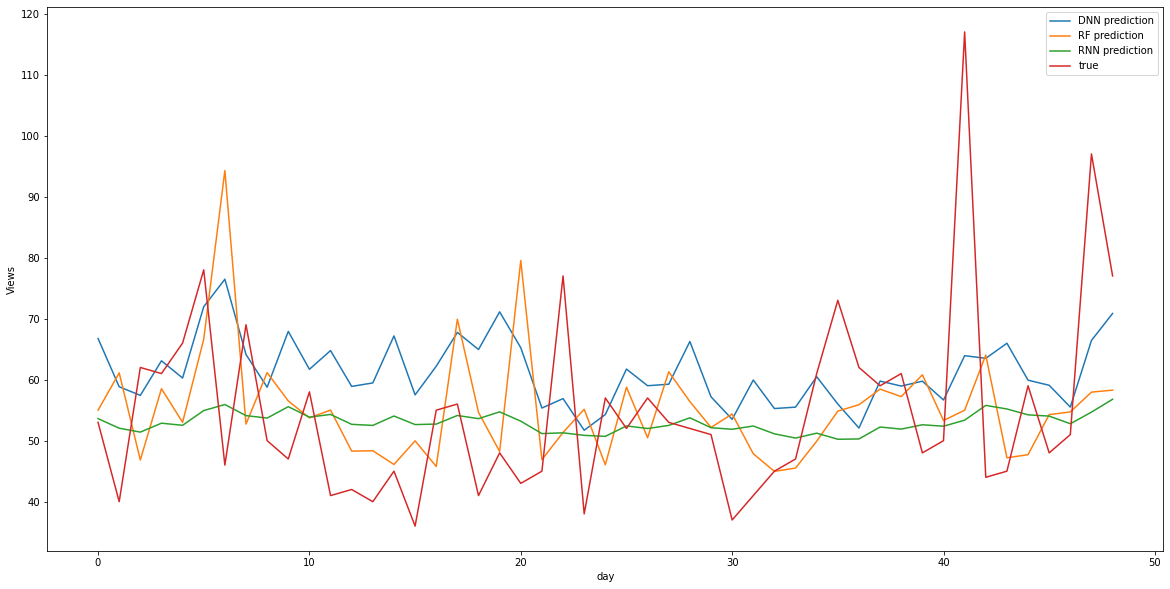

In [13]:
# Building Models
DNN = model_DNN_factory()
RNN = model_RNN_factory(X_train4_RNN)
RF = model_RF_factory()


# Training Models
DNN.fit(tf.convert_to_tensor(X_train4.astype('float64')), tf.convert_to_tensor(y_train4.astype('float64')), batch_size=32, epochs=100, verbose=0)
RF.fit((X_train4), (y_train4))
RNN.fit(tf.convert_to_tensor(X_train4_RNN.astype('float64')), tf.convert_to_tensor(y_train4.astype('float64')), batch_size=32, epochs=100, verbose=0)

# Testing Models
DNN_prediction4 = DNN.predict(tf.convert_to_tensor(X_test4.astype('float64')))
print('DNN_rmse = ', np.sqrt(mean_squared_error(y_test4, DNN_prediction4)))

RF_prediction4 = RF.predict(X_test4)
print('RF_rmse = ', np.sqrt(mean_squared_error(y_test4, RF_prediction4)))

RNN_prediction4 = RNN.predict(tf.convert_to_tensor(X_test4_RNN.astype('float64')) )
RNN_prediction4 = RNN_prediction4.reshape(-1)
print('RNN_rmse = ', np.sqrt(mean_squared_error(y_test4, RNN_prediction4)))

# Plotting Predictions
plt.figure(figsize=(20,10))
plt.plot(list(range(len(DNN_prediction4.reshape(-1)) )), DNN_prediction4.reshape(-1).tolist(), label='DNN prediction')
plt.plot(list(range(len(RF_prediction4) )), RF_prediction4, label='RF prediction')
plt.plot(list(range(len(RNN_prediction4) )), RNN_prediction4, label='RNN prediction')
plt.plot(list(range(len(y_test4))), y_test4, label='true')
plt.legend()
plt.ylabel('Views')
plt.xlabel('day')

### Training for "IPhone" article

In [14]:
# Building Models
DNN = model_DNN_factory()
RNN = model_RNN_factory(X_train5_RNN)
RF = model_RF_factory()


# Training Models
DNN.fit(tf.convert_to_tensor(X_train5.astype('float64')), tf.convert_to_tensor(y_train5.astype('float64')), batch_size=32, epochs=100, verbose=0)
RF.fit((X_train5), (y_train5))
RNN.fit(tf.convert_to_tensor(X_train5_RNN.astype('float64')), tf.convert_to_tensor(y_train5.astype('float64')), batch_size=32, epochs=100, verbose=0)

# Testing Models
DNN_prediction5 = DNN.predict(tf.convert_to_tensor(X_test5.astype('float64')))
print('DNN_rmse = ', np.sqrt(mean_squared_error(y_test5, DNN_prediction5)))

RF_prediction5 = RF.predict(X_test5)
print('RF_rmse = ', np.sqrt(mean_squared_error(y_test5, RF_prediction5)))

RNN_prediction5 = RNN.predict(tf.convert_to_tensor(X_test5_RNN.astype('float64')) )
RNN_prediction5 = RNN_prediction5.reshape(-1)
print('RNN_rmse = ', np.sqrt(mean_squared_error(y_test5, RNN_prediction5)))

# Plotting Predictions
plt.figure(figsize=(20,10))
plt.plot(list(range(len(DNN_prediction5.reshape(-1)) )), DNN_prediction5.reshape(-1).tolist(), label='DNN prediction')
plt.plot(list(range(len(RF_prediction5) )), RF_prediction5, label='RF prediction')
plt.plot(list(range(len(RNN_prediction5) )), RNN_prediction5, label='RNN prediction')
plt.plot(list(range(len(y_test5))), y_test5, label='true')
plt.legend()
plt.ylabel('Views')
plt.xlabel('day')

DNN_rmse =  15.328768566140694
RF_rmse =  17.489012935823098
RNN_rmse =  13.918943771444447


Text(0.5, 0, 'day')

 ### Comparison

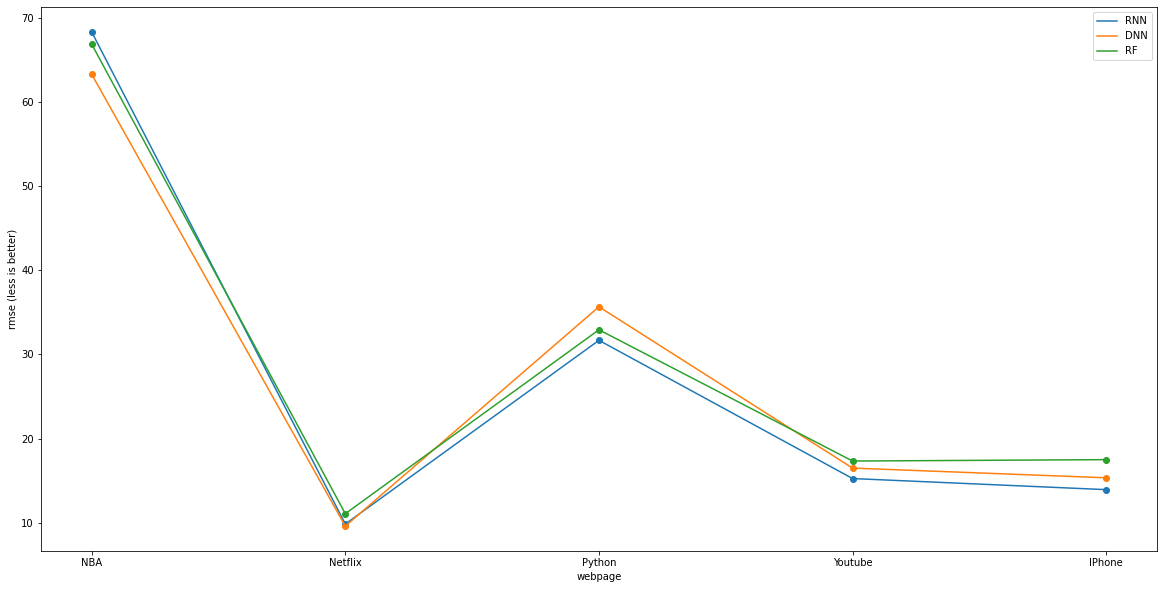

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
xs = ['NBA', 'Netflix', 'Python', 'Youtube', 'IPhone']
plt.plot(xs, [68.36218084697714, 9.828358958474821,31.682098129230017, 15.239970555657555, 13.918943771444447], label='RNN')
plt.scatter(xs, [68.36218084697714, 9.828358958474821,31.682098129230017, 15.239970555657555, 13.918943771444447])

plt.plot(xs, [63.3195471921889, 9.585238375489801, 35.67137830823708, 16.484690354575644, 15.328768566140694], label='DNN')
plt.scatter(xs, [63.3195471921889, 9.585238375489801, 35.67137830823708, 16.484690354575644, 15.328768566140694])

plt.plot(xs, [66.90702922102933, 11.058417054673876, 32.934086925746904, 17.32227821185711, 17.489012935823098], label='RF')
plt.scatter(xs, [66.90702922102933, 11.058417054673876, 32.934086925746904, 17.32227821185711, 17.489012935823098])

plt.xlabel('webpage')
plt.ylabel('rmse (less is better)')
plt.legend()

This plot shows that DNN achieved the lowest error for "NBA" and "Netflix", whereas RNN presented the best performance for the remaining  websites (i.e, "Pyhton", "YoutTube". "IPhone").

### Conclusion

In this project, tensorflow and sklearn models were used to predict website daily views in a time series. Although this simple notebook can be improved in the future (e.g., feature engineering), the results show that this approach can be applied to other problems and other models can also be used.